In [1]:
%matplotlib notebook

In [28]:
cd /XF11ID/analysis/2016_1/Leheny/

/XF11ID/analysis/2016_1/Leheny


In [29]:
%run Spatial_Correlation_Function.py

## Load data

In [6]:
uid = '53b84188'
uid = '156f8613-d43e-4d04-ad6c-a53925b3426a'
uid = '2280ae8e-573c-4a57-8327-480738415067'


uid = '7b32952c-f0bc-4047-adc8-296bc8eae727' # diff.xh, 21 points 1s exposure, focused beam with size as 

uid = '6c485da0-67f4-49d6' #diff.yh, 21 points 1s exposure
#uid = '3ba13399-fe1d-424c-b'

uid = '23a06f8e'  # 4527: dscan(diff.xh,-.02,.02,40) comment = 'aerogel #2 .1s 40um 1um step')
                  #41 data points in individual master files... last sequence ID: 474

uid =  '90ff5687' 

uid ='9e4cc5b2'

                                             # below scans with V focus at 43.7 m
uid = '4eff2043-e97e-460e-9538-1620980f775f' # 4544: dscan(diff.yh,-.02,.02,40) comment = 'aerogel #2 1.0s 40um 1um step')
                                             # corrupted Eiger files
uid = '832790fe-2918-49d7-b4e1-cc71a666b605' # 4542: dscan(diff.xh,-.02,.02,40), comment = 'aerogel #2 1.0s 40um 1um step')
uid = '64b49000-5129-4518-b00d-368e8380c185' # 4543: dscan(diff.yh,-.02,.02,40)comment = 'aerogel #2 0.1s 40um 1um step')

# below scans with V focus at 53.7 m
uid = '1bb5ff8f-7070-4019-876f-5fb053f57bb0' # 4556: dscan(diff.yh,-.02,.02,40) comment = 'aerogel #2 1.0s 40um 1um step')
uid = '493d70c7-9221-4eaf-9f69-af57c2155feb' # 4555: dscan(diff.yh,-.02,.02,40) comment = 'aerogel #2 0.1s 40um 1um step')
uid = '25df546a-762c-4c3e-9b6c-bba437838d0b' # 4553: dscan(diff.xh,-.02,.02,40) comment = 'aerogel #2 1.0s 40um 1um step')
uid = '889b5779-2b37-4322-821c-7d24fb0da463' # 4552: dscan(diff.xh,-.02,.02,40)comment = 'aerogel #2 0.1s 40um 1um step')

hdr = db[uid]
detector = 'eiger4m_single_image'
#detector = 'image'


#list( hdr['descriptors'][0]['data_keys'])[2]

print (detector)

eiger4m_single_image


In [385]:
 #imgs = get_images( hdr, detector)

In [386]:
#imgs[0]

In [7]:
imgs = load_images(hdr, detector)

hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_779_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_779_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_780_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_781_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_782_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_783_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_784_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_785_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_786_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_787_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_788_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_789_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95d43e81-377b-4a15-bb9a_790_master.h5
hdf5 path = /XF11ID/data/2016/03/04/95

## Load mask

In [9]:
path = '/XF11ID/analysis/2016_1/Leheny/Results/'


print ("The analysis results will be saved in : %s"%path)
mask = np.load(    path +   'aerogel'+"_mask.npy" )

The analysis results will be saved in : /XF11ID/analysis/2016_1/Leheny/Results/


<IPython.core.display.Javascript object>


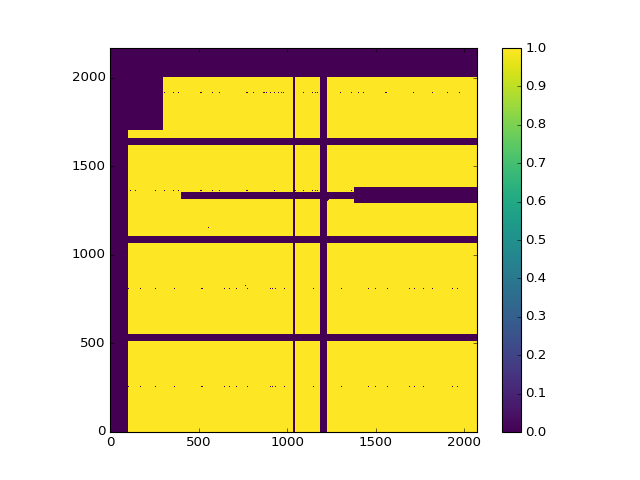

In [10]:
show_img( mask )

## Do average images

In [11]:
dpix = 0.075
Ldet = 4840        # detector to sample distance (mm), overriding metadata stored by det
lambda_ = 1.3776   # wavelegth of the X-rays in Angstroms
 
avg_img = np.average(imgs[ ::1  ], axis=0)*mask  #average of whole frames into one ave_img
#avg_img=(img1+img2)/2.0*mask


<IPython.core.display.Javascript object>


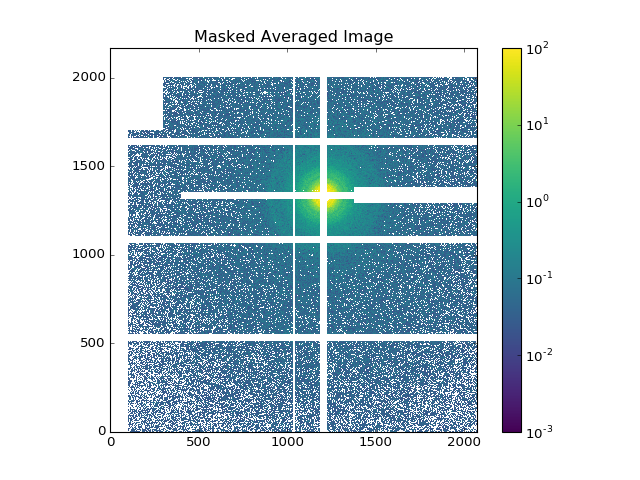

In [12]:
fig, ax = plt.subplots()
im = ax.imshow( avg_img, cmap='viridis',origin='lower',
               norm= LogNorm(vmin=0.001, vmax=1e2), interpolation="nearest") 
ax.set_title("Masked Averaged Image")
fig.colorbar(im)
plt.show()

# Check Beam Center

In [13]:
center = [1206.5, 1329.5]  # center of the speckle pattern

#center = [ 1329.5, 1206.5 ]  # center of the speckle pattern

#center = [1290.5, 1329.5]  # center of the speckle pattern


center=[center[1], center[0]]
inner_radius = 120  # radius of the first ring
outer_radius = 600  # radius of the last ring
width = 10      # width of each ring
num_rings = 6   # number of rings
spacing =   (outer_radius - inner_radius - width*num_rings)/(num_rings-1)    # spacing between rings
#  find the edges of the required rings
edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, avg_img.shape)
ring_mask = rings*mask

<IPython.core.display.Javascript object>


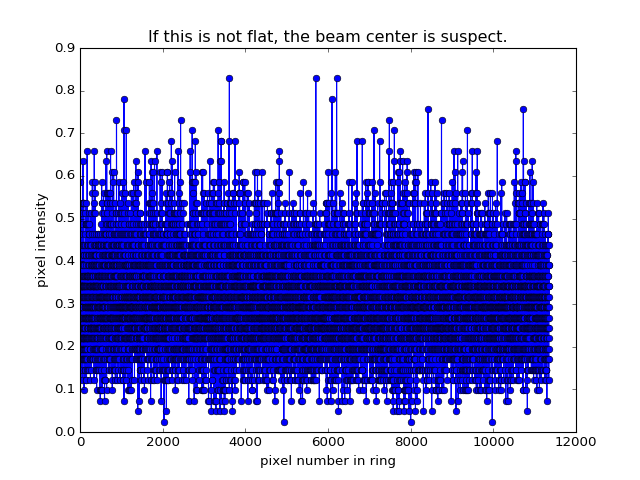

In [14]:
pixel = roi.roi_pixel_values(avg_img*mask, ring_mask, [2] )
fig, ax = plt.subplots()
ax.plot( pixel[0][0] ,'bo', ls='-' )

ax.set_xlabel('pixel number in ring')
ax.set_ylabel('pixel intensity')
plt.title("If this is not flat, the beam center is suspect.")

# Make ROI

## Define segments based on num_rings and num_seg

In [22]:
#center = [1202, 1332]  # center of the speckle pattern

center = [1206.5, 1329.5]  # center of the speckle pattern

center=[center[1], center[0]]
inner_radius = 40  # radius of the first ring
outer_radius = 240  # radius of the last ring
width = 100      # width of each ring
num_rings = 2   # number of rings
spacing =   (outer_radius - inner_radius - width*num_rings)/(num_rings-1)    # spacing between rings
#  find the edges of the required rings
edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

q_pixel,sq = circular_average(avg_img, 
        center, threshold=0, nx=1500, pixel_size=(dpix, dpix), mask = mask )

q_pixel /= dpix

In [23]:
num_seg = 10
segs = roi.segmented_rings(edges, num_seg, center, imgs[0].shape) * mask

<IPython.core.display.Javascript object>


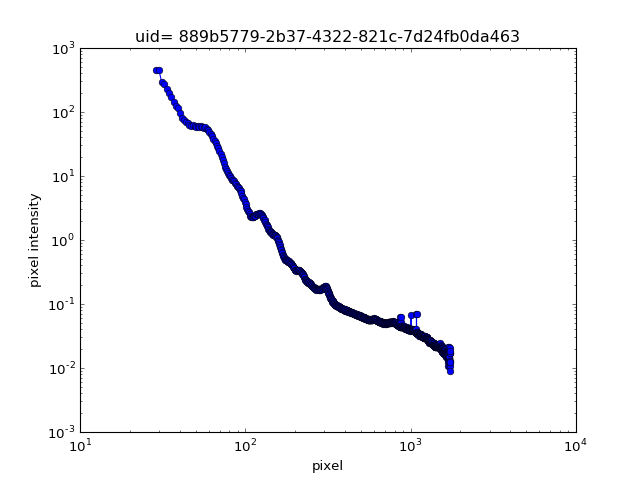

In [24]:
fig, ax = plt.subplots()
ax.loglog( q_pixel, sq, 'bo', ls='-' )

ax.set_xlabel('pixel')
ax.set_ylabel('pixel intensity')
plt.title("uid= %s" %uid)

<IPython.core.display.Javascript object>


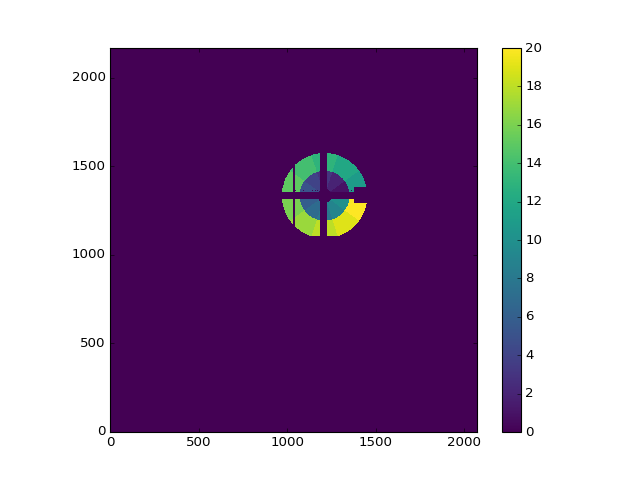

In [250]:
show_img( segs  )

In [25]:
img1 = imgs[10]

<IPython.core.display.Javascript object>


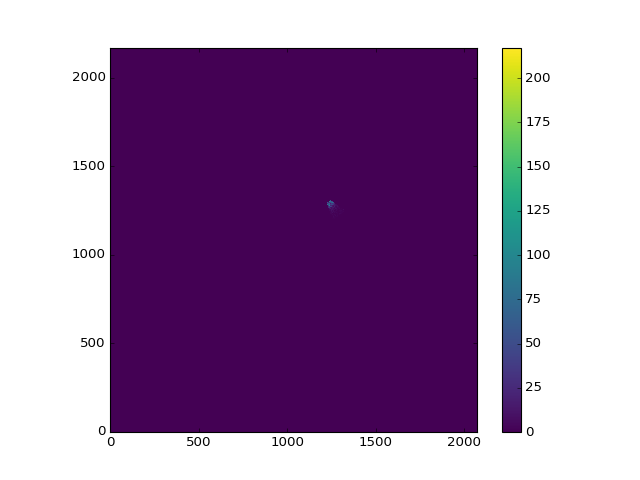

In [26]:
mask_seg = segs== 9 # 97   #  46
#pxlst = np.where(mask_seg.ravel())[0]
show_img( mask_seg *img1 )

min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319


<IPython.core.display.Javascript object>


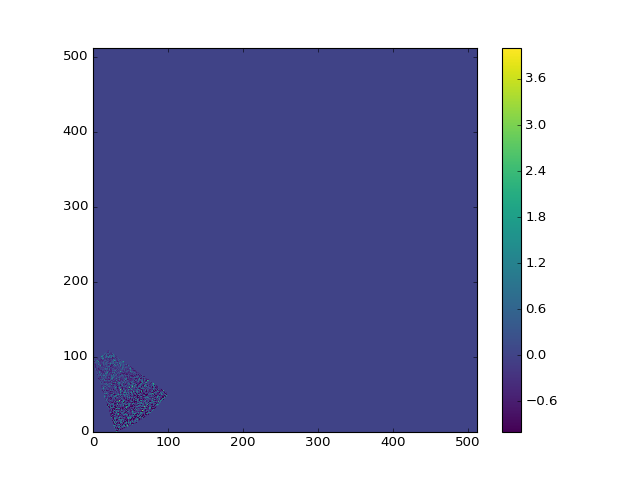

<IPython.core.display.Javascript object>


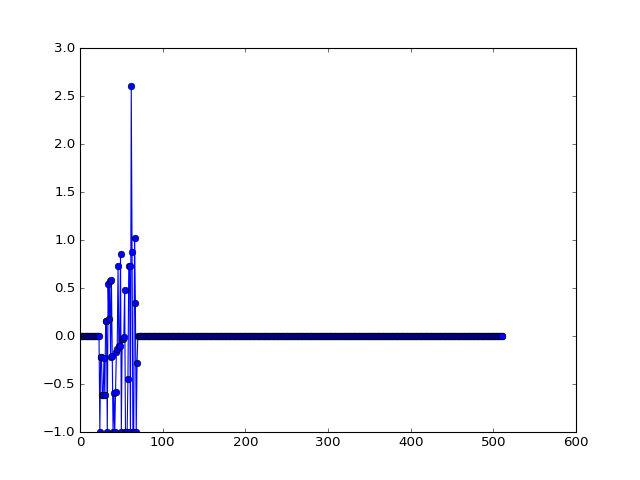

<IPython.core.display.Javascript object>


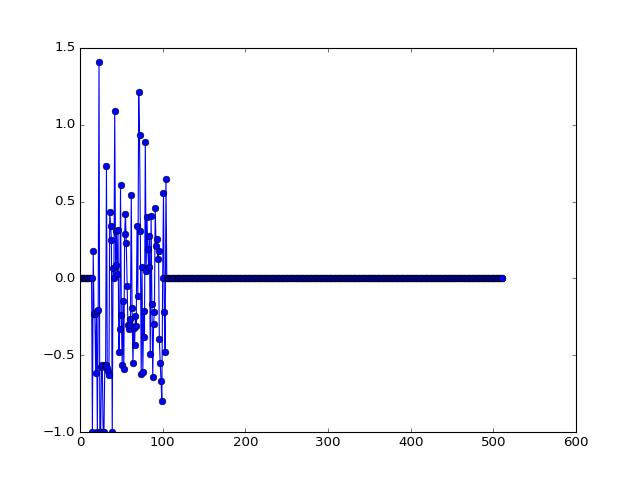

In [20]:
pxlst = np.where( mask_seg.ravel())[0]

#img1 = imgs[0]
dims = img1.shape
imgwidthy = dims[1]   #dimension in y, but in plot being x
imgwidthx = dims[0]   #dimension in x, but in plot being y
#x and y are flipped???
#matrix notation!!!
pixely = pxlst%imgwidthy -center[1]
pixelx = pxlst//imgwidthy - center[0]
r= np.int_( np.hypot(pixelx, pixely)    + 0.5  )  #why add 0.5?
    
    
subpxlst,submask = mkbox(   mask_seg  )
subimg1 = np.zeros_like(submask, dtype = float)
#subimg1.ravel()[subpxlst] = imgs[500].ravel()[pxlst] / np.interp( r,q_pixel,sq ) -1.0
subimg1.ravel()[subpxlst] = img1.ravel()[pxlst] / np.float32(np.interp( r,q_pixel,sq )) -1.0
show_img( subimg1  )
plot1D(  subimg1[20]  )
plot1D( subimg1[:,25 ] )

## Do spatial correlation here

min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxpixelx: 1197,1305;min/maxpixely: 1220,1319
The pixel shift in X-direction is: 0
The pixel shift in Y-direction is: 0
min/maxp

<IPython.core.display.Javascript object>


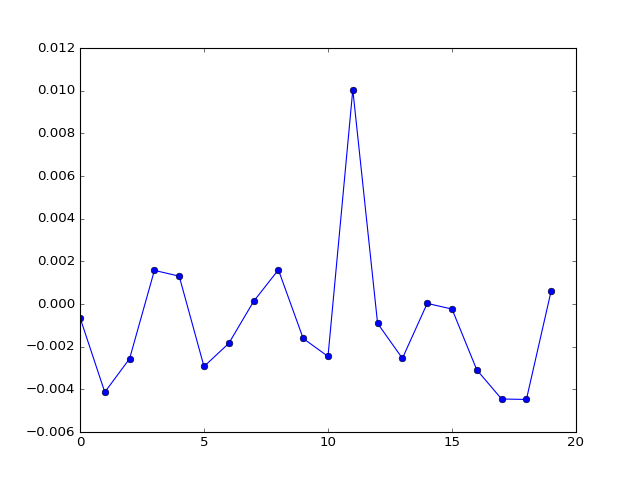

<IPython.core.display.Javascript object>


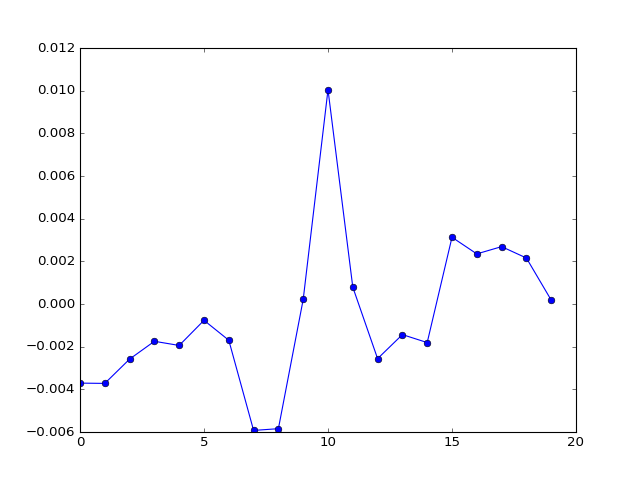

0.00196763018239 [  1.08469777e-01   9.81444106e+00   1.05200009e+01   8.57714837e-01
   7.85419248e-02   3.21235082e-01  -1.06636222e-03]
Area =  0.25626212074


<IPython.core.display.Javascript object>


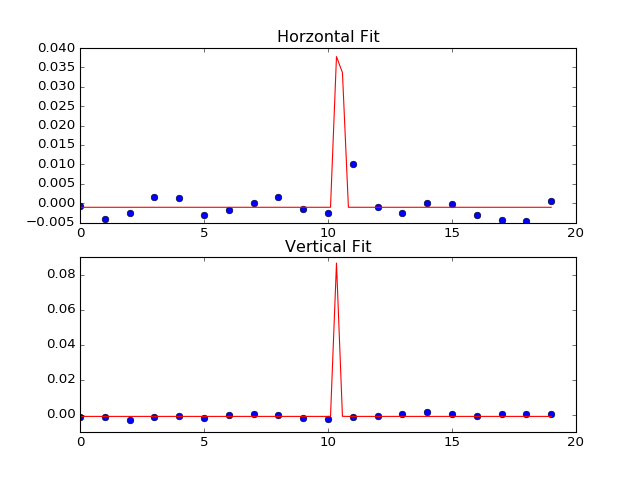

In [38]:
step = 20
plotdata = True
scan_points = 40

for i in range(scan_points-step+1):
    #if i<(40-step):
    #    pl = False
    #else:
    #    pl = True
        
    imgc_center_part,max_cx, max_cy = get_cross_plot(  imgs[i],imgs[i+step], center,
                    mask_seg, q_pixel, sq, imgc_width = 10,plot_=False ,  cx=10, cy =10) 
    
    if i==0:
        imgc_sum = imgc_center_part/np.float(scan_points-step+1.0)
    else:
        imgc_sum += imgc_center_part/np.float(scan_points-step+1.0)

if plotdata:        
    cx, cy = np.where( imgc_sum == imgc_sum.max() )        
    plot1D( np.transpose(imgc_sum[cx]) )
    plot1D( imgc_sum[:,cy ] )   
       
fit_two_Gaussian( imgc_sum,  max_cx,max_cy, initial_guess = (1., 10 , 10 , 1, 1, 0, 0), plot_=True  )

<IPython.core.display.Javascript object>


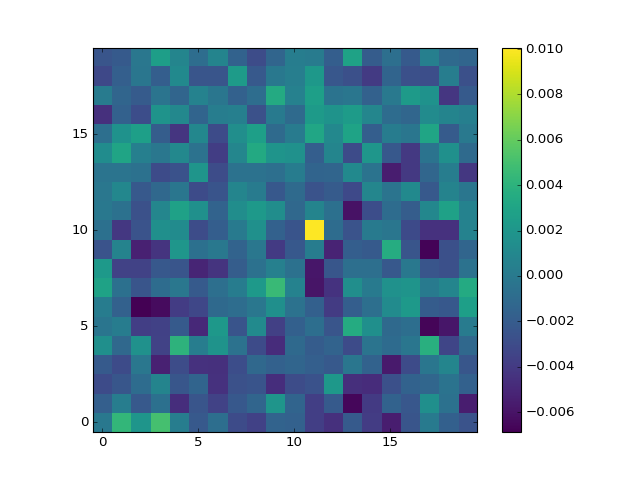

In [39]:
show_img(imgc_sum)